# Comparison with the Helstrom Bound
    
In this notebook we compare our results with the Helstrom Bound, which is the theoretical minimum-error probability there is when discriminating two non-orthogonal quantum states.

In [1]:
import sys 
sys.path.append('../../')

import itertools
import numpy as np
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
import matplotlib.pyplot as plt
from qnn.quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from qnn.quantum_state import QuantumState 

plt.style.use('ggplot')

In [2]:
# Create the experimental results for 30 qubits with diffents phases
th = np.linspace(0., pi / 2, num=30)
err = []
for theta in th:
    state0 = QuantumState([np.array([1, 0])])
    state1 = QuantumState([np.array([np.cos(theta), np.sin(theta)])])
    # Parameters
    th_u, fi_u, lam_u = [pi], [0], [0]
    th1, th2 = [0], [pi]
    th_v1, th_v2 = [0], [0]
    fi_v1, fi_v2 = [0], [pi / 2]
    lam_v1, lam_v2 = [pi], [0]

    params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))
    # Initialize Discriminator
    discriminator = nnd([state0, state1])

    # Calculate cost function
    results = discriminator.discriminate(SPSA(100), params)[1]
    err.append(results)

Text(0, 0.5, 'Error probability')

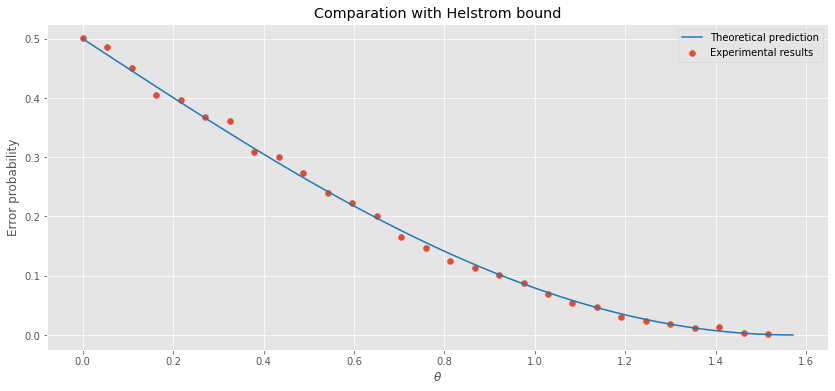

In [3]:
fig = plt.figure(figsize=(14,6))

# Draw the experimental results
plt.scatter(th[:-1], err[:-1], label='Experimental results')

# Calculate the teorical prediction by Helstrom Bound, as a continuous line
th_t = np.linspace(0., pi / 2, num=1000)
err_t = []
for theta in th_t:
    state0 = QuantumState(np.array([1, 0]))
    state1 = QuantumState(np.array([np.cos(theta), np.sin(theta)]))
    err_t.append(nnd.helstrom_bound(state0, state1))
plt.plot(th_t, err_t, label='Theoretical prediction', color='tab:blue')
plt.title('Comparation with Helstrom bound')
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$')
plt.ylabel("Error probability")

In [4]:
fig.savefig('helstrom.png')